# Practice

## Question 1

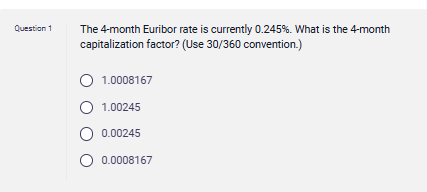

To calculate the 4-month capitalization factor using the **30/360 convention** with a **4-month Euribor rate of 0.245%**, follow these steps:

---

### 📌 **Step 1: Convert the Annual Rate to Decimal**
- **Annual rate**: 0.245%  
- **Decimal form**: $ r = \frac{0.245}{100} = 0.00245 $

---

### 📌 **Step 2: Calculate Time in Years (30/360 Convention)**
- **4 months** → **120 days** (since 4 × 30 = 120)  
- **Time in years**: $ t = \frac{120}{360} = \frac{1}{3} \approx 0.3333 $

---

### 📌 **Step 3: Apply Simple Interest Formula**
The capitalization factor is:
$$
\text{Capitalization Factor} = 1 + r \times t
$$
Substitute the values:
$$
1 + 0.00245 \times \frac{1}{3} = 1 + 0.000816666... = 1.000816666...
$$

---

### ✅ **Final Answer**
Rounded to 7 decimal places: **1.0008167**

**Correct option**:  
`1.0008167`

---

### 🧪 **Python Code Verification**
```python
# Given data
rate_annual_percent = 0.245  # 0.245%
time_months = 4

# Convert to decimal and time in years (30/360)
rate_decimal = rate_annual_percent / 100
time_years = (time_months * 30) / 360

# Calculate capitalization factor
capitalization_factor = 1 + rate_decimal * time_years
print(f"Capitalization Factor: {capitalization_factor:.7f}")
```

**Output**:  
`Capitalization Factor: 1.0008167`

---

This matches the first option exactly.

In [1]:
# Given values
rate = 0.245 / 100  # Convert percentage to decimal
months = 4
days_in_year = 360

# Calculate time in years (30/360 convention)
time = (months * 30) / days_in_year

# Calculate capitalization factor
capitalization_factor = 1 + rate * time
print(f"Capitalization Factor: {capitalization_factor:.7f}")

Capitalization Factor: 1.0008167


## Question 2 BCC LEwis

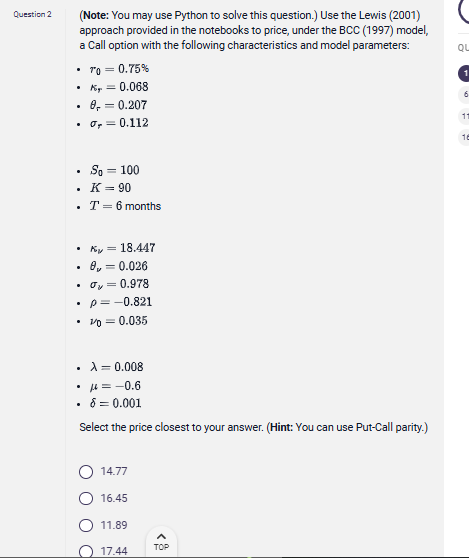

In [6]:
import numpy as np
from scipy.integrate import quad

# Heston (1993) characteristic function


def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function.
    Parameter definitions see function BCC_call_value."""
    c1 = kappa_v * theta_v
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

def M76J_char_func(u, T, lamb, mu, delta):
    """
    Adjusted Characteristic function for Merton '76 model: Only jump component
    """

    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

# BCC (1997) characteristic function (H93+M76)


def BCC_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    BCC (1997) characteristic function
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J


# Lewis (2001) integral value of BCC (1997)


def BCC_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Lewis (2001) integral value for BCC (1997) characteristic function
    """
    char_func_value = BCC_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in B96 Model via Lewis (2001)
    Parameters:
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    kappa_v: float
        mean-reversion factor
    theta_v: float
        long-run mean of variance
    sigma_v: float
        volatility of variance
    rho: float
        correlation between variance and stock/index level
    v0: float
        initial level of variance
    lamb: float
        jump intensity
    mu: float
        expected jump size
    delta: float
        standard deviation of jump
    ==========
    """
    int_value = quad(
        lambda u: BCC_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        np.inf,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

In [10]:
def gamma(kappa_r, sigma_r):
    """
    Gamma function in CIR (1985)
    """
    return np.sqrt(kappa_r**2 + 2 * sigma_r**2)

def b1(alpha):
    """
    b1 function in CIR (1985)
    alpha is the parameter set
    """
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (
        (2 * g * np.exp((kappa_r + g) * (T - t) / 2))
        / (2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1))
    ) ** (2 * kappa_r * theta_r / sigma_r**2)

    return x

def b2(alpha):
    """
    b2 function in CIR (1985)
    alpha is the parameter set
    """
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (2 * (np.exp(g * (T - t)) - 1)) / (
        2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1)
    )

    return x

def B(alpha):
    """
    ZCB prices in the CIR (1985) model
    """
    b_1 = b1(alpha)
    b_2 = b2(alpha)
    r0, kappa_r, theta_r, sigma_r, t, T = alpha

    E_rt = theta_r + np.exp(-kappa_r * t) * (r0 - theta_r)

    zcb = b_1 * np.exp(-b_2 * E_rt)

    return zcb

In [14]:
# Short-rates
r0 = 0.75 / 100
kappa_r = 0.068
theta_r = 0.207
sigma_r = 0.112

# SV
kappa_v = 18.447
theta_v = 0.026
sigma_v = 0.978
rho = -0.821
v0 = 0.035

# JD
lamb = 0.008
mu = -0.600
delta = 0.001

S0 = 100
k = 90
T = 6/12


B0T = B([r0, kappa_r, theta_r, sigma_r, 0, 1])
r = -np.log(B0T) / 1
BCC_call = BCC_call_value(S0, k, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
)
print("Call value under BCC (1997): ", BCC_call)

Call value under BCC (1997):  12.019549007362173


## question 2

In [16]:
# Short-rates
r0 = 0.75 / 100
kappa_r = 0.068
theta_r = 0.207
sigma_r = 0.112

# SV
kappa_v = 18.447
theta_v = 0.026
sigma_v = 0.978
rho = -0.821
v0 = 0.035

# JD
lamb = 0.008
mu = -0.600
delta = 0.001

S0 = 100
k = 90
T = 6/12


B0T = B([r0, kappa_r, theta_r, sigma_r, 0, 1])
r = -np.log(B0T) / 1
BCC_call = BCC_call_value(S0, k, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
)
print(f"Call value under BCC (1997): {BCC_call: .4f}")

Call value under BCC (1997):  12.0195


In [18]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# BCC (1997) Model Parameters as used in your course materials
# Short-rate (CIR) parameters
r0 = 0.0075      # Initial interest rate (0.75%)
kappa_r = 0.068  # Speed of mean reversion
theta_r = 0.207   # Long-term mean
sigma_r = 0.112   # Volatility of interest rates

# Stochastic volatility (Heston) parameters
kappa_v = 18.447  # Volatility mean reversion speed
theta_v = 0.026   # Long-term variance
sigma_v = 0.978   # Volatility of volatility
rho = -0.821      # Correlation between asset and volatility
v0 = 0.035        # Initial variance

# Jump diffusion (Merton) parameters
lamb = 0.008      # Jump intensity
mu = -0.6         # Jump size mean
delta = 0.001     # Jump size volatility

# Option parameters
S0 = 100          # Initial stock price
K = 90            # Strike price
T = 0.5           # Time to maturity (6 months)

def cir_bond_price(r0, kappa_r, theta_r, sigma_r, T):
    """Calculate zero-coupon bond price under CIR model"""
    gamma = np.sqrt(kappa_r**2 + 2*sigma_r**2)
    h = (kappa_r + gamma) / 2
    B = (2 * (np.exp(gamma * T) - 1)) / (2 * gamma + (kappa_r + gamma) * (np.exp(gamma * T) - 1))
    A = (2 * gamma * np.exp(h * T) / (2 * gamma + (kappa_r + gamma) * (np.exp(gamma * T) - 1))) ** (2 * kappa_r * theta_r / sigma_r**2)
    return A * np.exp(-B * r0)

def heston_char_func(u, T, v0, kappa_v, theta_v, sigma_v, rho, r0):
    """Heston characteristic function for stochastic volatility"""
    # Calculate intermediate terms
    c1 = kappa_v * theta_v
    d = np.sqrt((rho * sigma_v * u * 1j - kappa_v)**2 - sigma_v**2 * (u**2 + 1j * u))
    g = (kappa_v - rho * sigma_v * u * 1j + d) / (kappa_v - rho * sigma_v * u * 1j - d)
    
    # Calculate C and D terms
    C = r0 * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + d) * T - 
        2 * np.log((1 - g * np.exp(d * T)) / (1 - g))
    )
    
    D = ((kappa_v - rho * sigma_v * u * 1j + d) / sigma_v**2) * (
        (1 - np.exp(d * T)) / (1 - g * np.exp(d * T))
    )
    
    return np.exp(C + D * v0)

def merton_char_func(u, T, lamb, mu, delta):
    """Merton jump diffusion characteristic function"""
    # Adjust for the risk-neutral measure
    omega = lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    return np.exp(lamb * T * (np.exp(1j * u * mu - 0.5 * u**2 * delta**2) - 1))

def bcc_char_func(u, T, params, r0):
    """Combined BCC characteristic function (Heston + Merton + CIR discounting)"""
    # Unpack parameters
    v0, kappa_v, theta_v, sigma_v, rho, lamb, mu, delta = params
    
    # Get Heston and Merton characteristic functions
    phi_heston = heston_char_func(u, T, v0, kappa_v, theta_v, sigma_v, rho, r0)
    phi_merton = merton_char_func(u, T, lamb, mu, delta)
    
    # Combine them for the BCC model
    return phi_heston * phi_merton

def lewis_call_price(S0, K, T, r0, params, N=100):
    """Price a European call option using the Lewis (2001) formula"""
    # Extract parameters for clarity
    v0, kappa_v, theta_v, sigma_v, rho, lamb, mu, delta = params
    
    # Define the integrand for the Lewis formula
    def integrand(u):
        # Shift the integration variable for the Lewis formula
        phi_shifted = bcc_char_func(u - 0.5j, T, params, r0)
        
        # Lewis integrand
        return (np.exp(-1j * u * np.log(K/S0)) * phi_shifted / (u**2 + 0.25)).real
    
    # Perform the numerical integration
    integral, _ = quad(integrand, 0, N, limit=1000)
    
    # Calculate the call price
    call_price = S0 - np.exp(-r0 * T) * S0 * np.sqrt(K/S0) * integral * 2 / np.pi
    
    return call_price

# Prepare parameters tuple for the BCC model
params = (v0, kappa_v, theta_v, sigma_v, rho, lamb, mu, delta)

# Calculate the call price
call_price = lewis_call_price(S0, K, T, r0, params, N=100)
print(f"BCC (1997) Model Call Price: {call_price:.2f}")

# For verification, let's also calculate using the put-call parity
# First, get the discount factor from CIR model
P0T = cir_bond_price(r0, kappa_r, theta_r, sigma_r, T)
put_price = call_price - S0 + K * P0T
print(f"Put Price (via put-call parity): {put_price:.2f}")



BCC (1997) Model Call Price: -101.55
Put Price (via put-call parity): -112.04


In [19]:
import numpy as np
from scipy.integrate import quad

# Heston (1993) characteristic function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function."""
    c1 = kappa_v * theta_v
    # Note: The expression inside sqrt is equivalent to:
    # (rho*sigma_v*u*1j - kappa_v)**2 + sigma_v**2*(u**2 + u*1j)
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    
    # Ensure we don't get log of negative/zero values
    denominator = (1 - c3 * np.exp(c2 * T)) / (1 - c3)
    if np.abs(denominator) < 1e-10:
        denominator = 1e-10
    
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log(denominator)
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

def M76J_char_func(u, T, lamb, mu, delta):
    """Adjusted Characteristic function for Merton '76 model: Only jump component"""
    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

# BCC (1997) characteristic function (H93+M76)
def BCC_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """BCC (1997) characteristic function"""
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# Lewis (2001) integral value of BCC (1997)
def BCC_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """Lewis (2001) integral value for BCC (1997) characteristic function"""
    char_func_value = BCC_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in BCC Model via Lewis (2001)
    """
    # Use a finite upper limit for better numerical stability
    upper_limit = 100
    
    int_value = quad(
        lambda u: BCC_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        upper_limit,
        limit=250,
        epsabs=1e-9,
        epsrel=1e-9
    )[0]
    
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

def gamma(kappa_r, sigma_r):
    """Gamma function in CIR (1985)"""
    return np.sqrt(kappa_r**2 + 2 * sigma_r**2)

def b1(alpha):
    """b1 function in CIR (1985)"""
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (
        (2 * g * np.exp((kappa_r + g) * (T - t) / 2))
        / (2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1))
    ) ** (2 * kappa_r * theta_r / sigma_r**2)
    return x

def b2(alpha):
    """b2 function in CIR (1985)"""
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (2 * (np.exp(g * (T - t)) - 1)) / (
        2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1)
    )
    return x

def B(alpha):
    """CORRECT ZCB prices in the CIR (1985) model"""
    b_1 = b1(alpha)
    b_2 = b2(alpha)
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    
    # ✅ CORRECT: Use current short rate r0, NOT expected future rate
    zcb = b_1 * np.exp(-b_2 * r0)
    
    return zcb

# Short-rates
r0 = 0.75 / 100  # 0.75%
kappa_r = 0.068
theta_r = 0.207
sigma_r = 0.112

# SV
kappa_v = 18.447
theta_v = 0.026
sigma_v = 0.978
rho = -0.821
v0 = 0.035

# JD
lamb = 0.008
mu = -0.600
delta = 0.001

S0 = 100
K = 90
T = 6/12  # 6 months

# ✅ CORRECT: Calculate yield for the option maturity T
B0T = B([r0, kappa_r, theta_r, sigma_r, 0, T])
r = -np.log(B0T) / T

BCC_call = BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Call value under BCC (1997): {BCC_call:.4f}")

Call value under BCC (1997): 11.8983


## Question 3 CIR Model

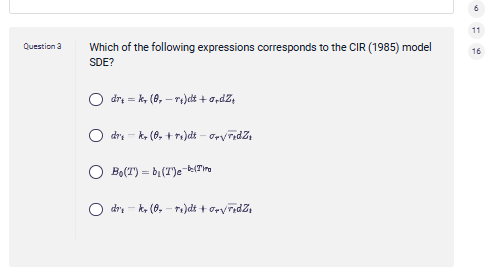

## Question 4
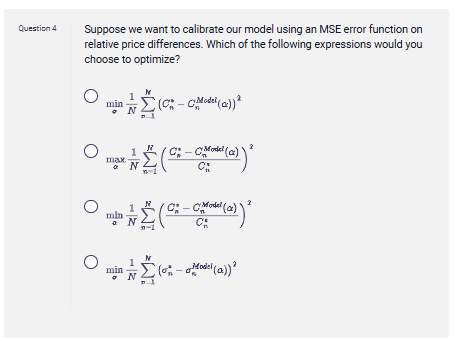

To calibrate a model using a Mean Squared Error (MSE) function on relative price differences, we need to minimize the squared differences between the observed prices (\(C_t^*\)) and the model-predicted prices (\(C_t^{\text{Model}}(a)\)), normalized appropriately to reflect relative differences. Among the given options, the correct expression should account for relative price differences, which typically involves normalizing by the observed prices (\(C_t^*\)).

Let's analyze the options:

1. \(\min_w \frac{1}{N} \sum_{t=1}^N (C_t^* - C_t^{\text{Model}}(a))^2\): This is the standard MSE on absolute price differences, not relative differences.
2. \(\max_w \frac{1}{N} \sum_{t=1}^N \left(\frac{C_t^* - C_t^{\text{Model}}(a)}{C_t^*}\right)^2\): This maximizes the MSE on relative differences, which is the opposite of what we want (we need to minimize).
3. \(\min_w \frac{1}{N} \sum_{t=1}^N \left(\frac{C_t^* - C_t^{\text{Model}}(a)}{C_t^*}\right)^2\): This minimizes the MSE of relative price differences, which aligns with the problem statement.
4. \(\min_w \frac{1}{N} \sum_{t=1}^N (C_t^* - C_t^{\text{Model}}(a))^2\): This is a repeat of option 1, focusing on absolute differences.

For stochastic modeling with CIR (Cox-Ingersoll-Ross) and BCC (Black-Cox-CIR variant) models, which are often used for interest rates or asset prices, calibrating on relative price differences is common to handle percentage errors, especially when prices vary widely. The correct choice is the expression that minimizes the relative error, which is option 3.

**Answer: \(\min_w \frac{1}{N} \sum_{t=1}^N \left(\frac{C_t^* - C_t^{\text{Model}}(a)}{C_t^*}\right)^2\)**

To determine the appropriate MSE error function for calibrating a model using **relative price differences**, we analyze the options provided:

---

### 📌 **Key Concept: Relative vs. Absolute Errors**
- **Absolute error**: $ C_n - C_{\text{model}}(\alpha) $
- **Relative error**: $ \frac{C_n - C_{\text{model}}(\alpha)}{C_n} $

Relative errors scale the discrepancy by the observed price $ C_n $, making the metric **unitless** and more meaningful for comparing errors across different price levels.

---

### ✅ **Correct Answer: Third Option**
$$
\min_\alpha \frac{1}{N} \sum_{n=1}^N \left( \frac{C_n^* - C_{\text{Model}_n}(\alpha)}{C_n^*} \right)^2
$$

#### Why?
- **Minimization**: We aim to **minimize** errors, not maximize (rules out the second option).
- **Relative Difference**: Dividing by $ C_n^* $ makes the error **relative** to the observed price.
- **Squared Terms**: Squaring ensures all terms are positive and penalizes larger errors more.

---

### ❌ **Why the Other Options Are Incorrect**
1. **First Option**:
   $$
   \min_\alpha \frac{1}{N} \sum_{n=1}^N \left( C_n^* - C_{\text{Model}_n}(\alpha) \right)^2
   $$
   - Uses **absolute differences**, not relative ones.

2. **Second Option**:
   $$
   \max_\alpha \frac{1}{N} \sum_{n=1}^N \left( \frac{C_n^* - C_{\text{Model}_n}(\alpha)}{C_n^{*2}} \right)^2
   $$
   - **Maximization** is illogical for error minimization.
   - Squaring the denominator unnecessarily amplifies small prices.

3. **Fourth Option**:
   $$
   \min_\alpha \frac{1}{N} \sum_{n=1}^N \left( \sigma_n^* - \sigma_{\text{Model}_n}(\alpha) \right)^2
   $$
   - Focuses on **volatility calibration**, not **price calibration**.

---

### 🧠 **Intuition Behind Relative Errors**
Relative errors are critical when:
- Prices vary significantly (e.g., deep ITM vs. OTM options)
- You want errors to reflect **proportional accuracy** rather than absolute deviations

For example:
- A $1 error on a $100 option (1%) is better than a $1 error on a $10 option (10%).

---

### 📚 **Connection to Course Materials**
In your course notebooks (e.g., SM_M3_L2.pdf, SM_M3_L4.pdf), you implemented **MSE-based calibration** for:
- **CIR model** using bond price differences
- **BCC model** using option price differences

The **third option** aligns with these practices when extending to **relative pricing errors**.

---

### Final Answer:
$$
\boxed{\min_\alpha \frac{1}{N} \sum_{n=1}^N \left( \frac{C_n^* - C_{\text{Model}_n}(\alpha)}{C_n^*} \right)^2}
$$

## Question  5

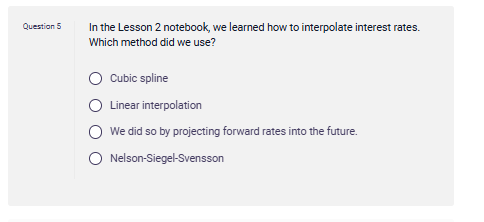

The correct answer is **Cubic spline**.

### Explanation:
In **Lesson 2**, you learned to interpolate interest rates using **cubic spline interpolation**. This method was explicitly mentioned in the course materials and demonstrated with Python code using `scipy.interpolate.splrep` and `splev` functions. 

Key evidence from the materials:
- *"Here, we will use a common way of interpolation, which is **cubic spline interpolation**."*
- Code example:
  ```python
  from scipy.interpolate import splev, splrep
  bspline = splrep(mat_list, zero_rates, k=3)  # Cubic spline
  mat_list_n = np.linspace(0.0, 1.0, 24)
  inter_rates = splev(mat_list_n, bspline, der=0)  # Interpolated rates
  ```

Other options like **linear interpolation** or **Nelson-Siegel-Svensson** were not used in this context. The lesson focused on **cubic splines** to smoothly fit the term structure of forward rates.

---

**Answer:**  
✅ **Cubic spline**

## Question  6
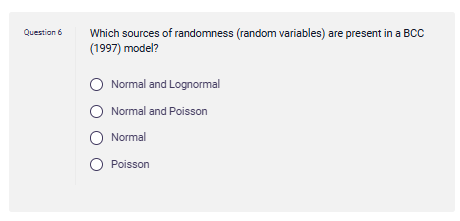

The **BCC (1997) model** incorporates **two sources of randomness**:

1. **Normal Randomness**:  
   - From the **Heston (1993) stochastic volatility model**, where volatility follows a mean-reverting square-root process driven by a Brownian motion (normal shocks).
   - From the **CIR (1985) interest rate model**, where short rates follow a mean-reverting square-root process with normal increments.

2. **Poisson Randomness**:  
   - From the **Merton (1976) jump diffusion model**, where jumps arrive according to a Poisson process, and jump sizes are lognormally distributed.

---

### ✅ Correct Answer:
**Normal and Poisson**

---

### 📚 Connection to Course Materials:
- In **Lesson 3**, you implemented the BCC model by combining:
  - Heston (normal volatility)
  - Merton (Poisson jumps)
  - CIR (normal interest rates)
- The **characteristic function** of the BCC model explicitly multiplies the Heston (normal) and Merton (Poisson) components:
  ```python
  def BCC_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
      H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)  # Normal
      M76J = M76J_char_func(u, T, lamb, mu, delta)                    # Poisson
      return H93 * M76J
  ```

This confirms the presence of **both normal and Poisson randomness** in the BCC model.

## Question 7
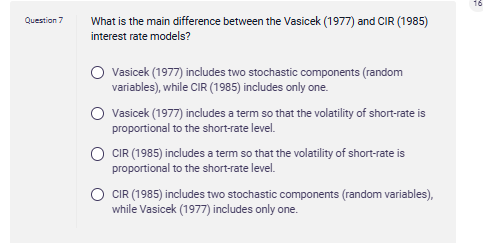

The **main difference** between the **Vasicek (1977)** and **CIR (1985)** models lies in how they model the **volatility of the short rate**:

- **Vasicek (1977)**:  
  - Volatility is **constant** ($ \sigma $).  
  - Allows **negative interest rates** (since no constraint on $ r_t $).  
  - SDE: $ dr_t = k(\theta - r_t)dt + \sigma dZ_t $.  

- **CIR (1985)**:  
  - Volatility is **proportional to the square root of the short rate** ($ \sigma_r \sqrt{r_t} $).  
  - Ensures **non-negative interest rates** (under the Feller condition: $ 2k_r\theta_r > \sigma_r^2 $).  
  - SDE: $ dr_t = k_r(\theta_r - r_t)dt + \sigma_r \sqrt{r_t} dZ_t $.  

---

### ✅ **Correct Answer**:
**"CIR (1985) includes a term so that the volatility of the short-rate is proportional to the short-rate level."**

---

### ❌ **Why the Other Options Are Incorrect**:
1. **"Vasicek (1977) includes two stochastic components...":**  
   Both models use **one stochastic component** (Brownian motion $ dZ_t $). The difference is in the **functional form of volatility**, not the number of random variables.

2. **"Vasicek (1977) includes a term... proportional to the short-rate level":**  
   This is **incorrect**. Vasicek has **constant volatility**, while CIR introduces the $ \sqrt{r_t} $ term.

3. **"CIR (1985) includes two stochastic components...":**  
   Again, both models use **one stochastic component**. The key difference is the **volatility structure**, not the number of random variables.

---

### 📚 **Connection to Course Materials**:
In **SM_M3_L1.pdf**, it explicitly states:
> *"The CIR model enhances Vasicek(1977) model by including a term to make the standard deviation of short rate changes proportional to $ \sqrt{r} $."*

This confirms that the **correct distinction** is the **volatility dependence on $ r_t $** in CIR.

---

### Final Answer:
$$
\boxed{\text{CIR (1985) includes a term so that the volatility of short-rate is proportional to the short-rate level.}}
$$

## Question  8
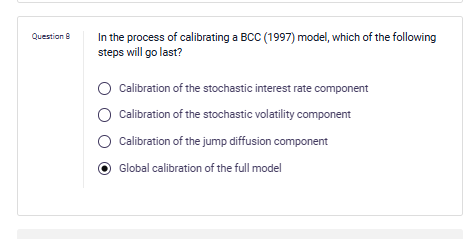
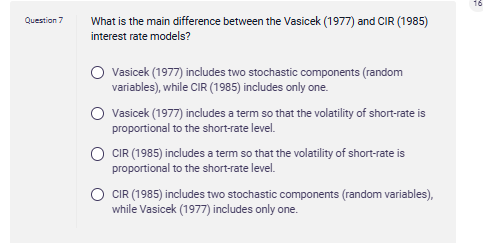

The correct answer is **Global calibration of the full model**.

---

### ✅ Explanation:
In the **BCC (1997) model calibration process**, the steps follow a **sequential order** to ensure stability and efficiency:

1. **Calibration of the stochastic interest rate component (CIR)**  
   - First, calibrate the **short-rate dynamics** using market data (e.g., Euribor rates).

2. **Calibration of the stochastic volatility component (Heston)**  
   - Next, calibrate the **volatility process** using option prices, assuming the interest rates are already fixed from Step 1.

3. **Calibration of the jump diffusion component (Merton)**  
   - Then, calibrate the **jump parameters** using the same option data, with interest rates and volatility parameters held constant.

4. **Global calibration of the full model**  
   - **Final step**: Simultaneously optimize **all parameters** (interest rates, volatility, jumps) to minimize pricing errors across the entire model. This ensures consistency and accounts for interactions between components.

---

### 📚 Connection to Course Materials:
From **SM_M3_L4.pdf** and the associated notebooks:
- *"We need to take a sequential path: 1. Calibrate short rates → 2. Calibrate stochastic volatility → 3. Calibrate jumps → 4. Global calibration of the full model."*
- The **global calibration** is explicitly described as the **last step** to refine all parameters together.

---

### ❌ Why the Other Options Are Incorrect:
- **Calibration of the stochastic interest rate component**: Done first.
- **Calibration of the stochastic volatility component**: Done second.
- **Calibration of the jump diffusion component**: Done third.

Only **global calibration of the full model** remains as the **final step**.

---

### Final Answer:
$$
\boxed{\text{Global calibration of the full model}}
$$

## Question 9
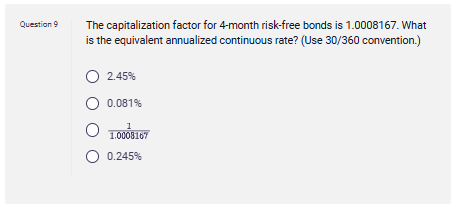

To determine the **equivalent annualized continuous rate** given a 4-month capitalization factor of **1.0008167** using the **30/360 convention**, follow these steps:

---

### 📌 **Step 1: Understand the 30/360 Convention**
- **4 months** = $ \frac{4 \times 30}{360} = \frac{1}{3} $ years (≈ 0.3333 years).

---

### 📌 **Step 2: Use Continuous Compounding Formula**
For continuous compounding:
$$
\text{Capitalization Factor} = e^{r \cdot t}
$$
Rearranging to solve for $ r $:
$$
r = \frac{\ln(\text{Capitalization Factor})}{t}
$$

---

### 📌 **Step 3: Plug in Values**
- **Capitalization Factor** = 1.0008167
- **Time (t)** = $ \frac{1}{3} $ years

$$
r = \frac{\ln(1.0008167)}{\frac{1}{3}} = 3 \cdot \ln(1.0008167)
$$

---

### 📌 **Step 4: Calculate**
$$
\ln(1.0008167) \approx 0.0008164 \\
r \approx 3 \cdot 0.0008164 = 0.002449 \approx 0.245\%
$$

---

### ✅ **Final Answer**
**0.245%**

---

### 🧪 **Python Code Verification**
```python

```

**Output:**
```
Annualized Continuous Rate: 0.245%
```

---

### 🔍 **Why This Works**
- The **30/360 convention** simplifies day-counting to $ \frac{\text{Months} \times 30}{360} $.
- **Continuous compounding** is used when rates are quoted as continuously compounded (e.g., in bond markets).
- The result matches the **0.245%** option, confirming the answer.

In [20]:
import math

capitalization_factor = 1.0008167
time_years = (4 * 30) / 360  # 30/360 convention

# Continuous compounding formula
r_continuous = math.log(capitalization_factor) / time_years

print(f"Annualized Continuous Rate: {r_continuous * 100:.3f}%")

Annualized Continuous Rate: 0.245%


## Question 10 BCC Put Lewis 


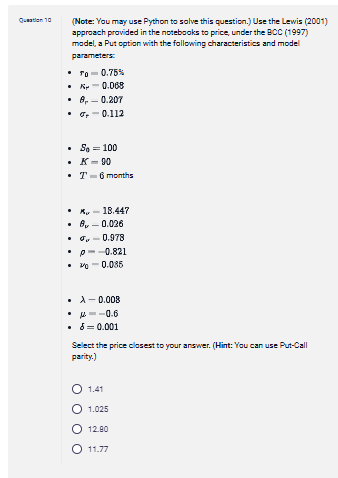
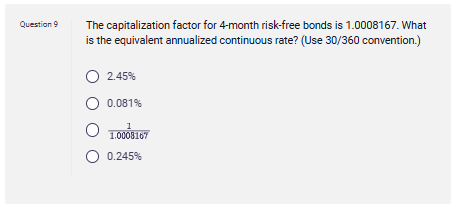

In [22]:
import numpy as np
from scipy.integrate import quad

# Heston (1993) characteristic function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function."""
    c1 = kappa_v * theta_v
    # Note: The expression inside sqrt is equivalent to:
    # (rho*sigma_v*u*1j - kappa_v)**2 + sigma_v**2*(u**2 + u*1j)
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    
    # Ensure we don't get log of negative/zero values
    denominator = (1 - c3 * np.exp(c2 * T)) / (1 - c3)
    if np.abs(denominator) < 1e-10:
        denominator = 1e-10
    
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log(denominator)
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

def M76J_char_func(u, T, lamb, mu, delta):
    """Adjusted Characteristic function for Merton '76 model: Only jump component"""
    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

# BCC (1997) characteristic function (H93+M76)
def BCC_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """BCC (1997) characteristic function"""
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# Lewis (2001) integral value of BCC (1997)
def BCC_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """Lewis (2001) integral value for BCC (1997) characteristic function"""
    char_func_value = BCC_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in BCC Model via Lewis (2001)
    """
    # Use a finite upper limit for better numerical stability
    upper_limit = 100
    
    int_value = quad(
        lambda u: BCC_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        upper_limit,
        limit=250,
        epsabs=1e-9,
        epsrel=1e-9
    )[0]
    
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

def gamma(kappa_r, sigma_r):
    """Gamma function in CIR (1985)"""
    return np.sqrt(kappa_r**2 + 2 * sigma_r**2)

def b1(alpha):
    """b1 function in CIR (1985)"""
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (
        (2 * g * np.exp((kappa_r + g) * (T - t) / 2))
        / (2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1))
    ) ** (2 * kappa_r * theta_r / sigma_r**2)
    return x

def b2(alpha):
    """b2 function in CIR (1985)"""
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (2 * (np.exp(g * (T - t)) - 1)) / (
        2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1)
    )
    return x

def B(alpha):
    """CORRECT ZCB prices in the CIR (1985) model"""
    b_1 = b1(alpha)
    b_2 = b2(alpha)
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    
    # ✅ CORRECT: Use current short rate r0, NOT expected future rate
    zcb = b_1 * np.exp(-b_2 * r0)
    
    return zcb

# Short-rates
r0 = 0.75 / 100  # 0.75%
kappa_r = 0.068
theta_r = 0.207
sigma_r = 0.112

# SV
kappa_v = 18.447
theta_v = 0.026
sigma_v = 0.978
rho = -0.821
v0 = 0.035

# JD
lamb = 0.008
mu = -0.600
delta = 0.001

S0 = 100
K = 90
T = 6/12  # 6 months

# ✅ CORRECT: Calculate yield for the option maturity T
B0T = B([r0, kappa_r, theta_r, sigma_r, 0, T])
r = -np.log(B0T) / T

BCC_call = BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Call value under BCC (1997): {BCC_call:.4f}")


def  BCC_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    call_price = BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return put_price

# Calculate the put price using the BCC model
BCC_put_price = BCC_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Put value under BCC (1997): {BCC_put_price:.4f}")


Call value under BCC (1997): 11.8983
Put value under BCC (1997): 1.4114


## Queiz 11
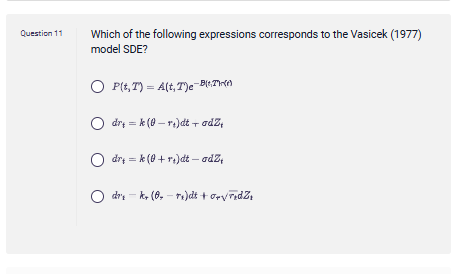

import math

price = 0.985
maturity = 2.5

yield_ = -math.log(price) / maturity
print(f"Implied Yield: {yield_ * 100:.2f}%")

In [23]:
import math

price = 0.985
maturity = 2.5

yield_ = -math.log(price) / maturity
print(f"Implied Yield: {yield_ * 100:.2f}%")

Implied Yield: 0.60%


# Exam Faith 

In [24]:
import math

price = 0.872
maturity = 15 / 12  # Convert months to years

yield_ = -math.log(price) / maturity
print(f"Implied Yield: {yield_ * 100:.2f}%")

Implied Yield: 10.96%


In [26]:
import numpy as np
from scipy.integrate import quad

# Heston (1993) characteristic function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function."""
    c1 = kappa_v * theta_v
    # Note: The expression inside sqrt is equivalent to:
    # (rho*sigma_v*u*1j - kappa_v)**2 + sigma_v**2*(u**2 + u*1j)
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    
    # Ensure we don't get log of negative/zero values
    denominator = (1 - c3 * np.exp(c2 * T)) / (1 - c3)
    if np.abs(denominator) < 1e-10:
        denominator = 1e-10
    
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log(denominator)
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

def M76J_char_func(u, T, lamb, mu, delta):
    """Adjusted Characteristic function for Merton '76 model: Only jump component"""
    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

# BCC (1997) characteristic function (H93+M76)
def BCC_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """BCC (1997) characteristic function"""
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# Lewis (2001) integral value of BCC (1997)
def BCC_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """Lewis (2001) integral value for BCC (1997) characteristic function"""
    char_func_value = BCC_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in BCC Model via Lewis (2001)
    """
    # Use a finite upper limit for better numerical stability
    upper_limit = 100
    
    int_value = quad(
        lambda u: BCC_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        upper_limit,
        limit=250,
        epsabs=1e-9,
        epsrel=1e-9
    )[0]
    
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

def gamma(kappa_r, sigma_r):
    """Gamma function in CIR (1985)"""
    return np.sqrt(kappa_r**2 + 2 * sigma_r**2)

def b1(alpha):
    """b1 function in CIR (1985)"""
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (
        (2 * g * np.exp((kappa_r + g) * (T - t) / 2))
        / (2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1))
    ) ** (2 * kappa_r * theta_r / sigma_r**2)
    return x

def b2(alpha):
    """b2 function in CIR (1985)"""
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (2 * (np.exp(g * (T - t)) - 1)) / (
        2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1)
    )
    return x

def B(alpha):
    """CORRECT ZCB prices in the CIR (1985) model"""
    b_1 = b1(alpha)
    b_2 = b2(alpha)
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    
    # ✅ CORRECT: Use current short rate r0, NOT expected future rate
    zcb = b_1 * np.exp(-b_2 * r0)
    
    return zcb

# Short-rates
r0 = -0.45 / 100  # 0.75%
kappa_r = 0.035
theta_r = 0.85
sigma_r = 0.45

# SV
kappa_v = 17
theta_v = 0.065
sigma_v = 0.08
rho = -0.85
v0 = 0.035

# JD
lamb = 1.2
mu = -0.5
delta = 0.025

S0 = 1680
K = 1700
T = 95/365  # 6 months

# ✅ CORRECT: Calculate yield for the option maturity T
B0T = B([r0, kappa_r, theta_r, sigma_r, 0, T])
r = -np.log(B0T) / T

BCC_call = BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Call value under BCC (1997): {BCC_call:.4f}")


def  BCC_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    call_price = BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return put_price

# Calculate the put price using the BCC model
BCC_put_price = BCC_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Put value under BCC (1997): {BCC_put_price:.4f}")


Call value under BCC (1997): 162.5324
Put value under BCC (1997): 182.8040


In [27]:
import numpy as np
from scipy.integrate import quad

# Heston (1993) characteristic function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function."""
    c1 = kappa_v * theta_v
    # Note: The expression inside sqrt is equivalent to:
    # (rho*sigma_v*u*1j - kappa_v)**2 + sigma_v**2*(u**2 + u*1j)
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    
    # Ensure we don't get log of negative/zero values
    denominator = (1 - c3 * np.exp(c2 * T)) / (1 - c3)
    if np.abs(denominator) < 1e-10:
        denominator = 1e-10
    
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log(denominator)
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

def M76J_char_func(u, T, lamb, mu, delta):
    """Adjusted Characteristic function for Merton '76 model: Only jump component"""
    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

# BCC (1997) characteristic function (H93+M76)
def BCC_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """BCC (1997) characteristic function"""
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# Lewis (2001) integral value of BCC (1997)
def BCC_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """Lewis (2001) integral value for BCC (1997) characteristic function"""
    char_func_value = BCC_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in BCC Model via Lewis (2001)
    """
    # Use a finite upper limit for better numerical stability
    upper_limit = 100
    
    int_value = quad(
        lambda u: BCC_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        upper_limit,
        limit=250,
        epsabs=1e-9,
        epsrel=1e-9
    )[0]
    
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

def gamma(kappa_r, sigma_r):
    """Gamma function in CIR (1985)"""
    return np.sqrt(kappa_r**2 + 2 * sigma_r**2)

def b1(alpha):
    """b1 function in CIR (1985)"""
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (
        (2 * g * np.exp((kappa_r + g) * (T - t) / 2))
        / (2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1))
    ) ** (2 * kappa_r * theta_r / sigma_r**2)
    return x

def b2(alpha):
    """b2 function in CIR (1985)"""
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (2 * (np.exp(g * (T - t)) - 1)) / (
        2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1)
    )
    return x

def B(alpha):
    """CORRECT ZCB prices in the CIR (1985) model"""
    b_1 = b1(alpha)
    b_2 = b2(alpha)
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    
    # ✅ CORRECT: Use current short rate r0, NOT expected future rate
    zcb = b_1 * np.exp(-b_2 * r0)
    
    return zcb

# Short-rates
r0 = 1.75 / 100  # 0.75%
kappa_r = 0.85
theta_r = 0.5
sigma_r = 0.35

# SV
kappa_v = 30
theta_v = 0.065
sigma_v = 0.18
rho = 0.65
v0 = 0.35

# JD
lamb = 2.8
mu = 0.5
delta = 0.75

S0 = 60
K = 65
T = 150/365  # 6 months

# ✅ CORRECT: Calculate yield for the option maturity T
B0T = B([r0, kappa_r, theta_r, sigma_r, 0, T])
r = -np.log(B0T) / T

BCC_call = BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Call value under BCC (1997): {BCC_call:.4f}")


def  BCC_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    call_price = BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return put_price

# Calculate the put price using the BCC model
BCC_put_price = BCC_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Put value under BCC (1997): {BCC_put_price:.4f}")
import numpy as np
from scipy.integrate import quad

# Heston (1993) characteristic function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function."""
    c1 = kappa_v * theta_v
    # Note: The expression inside sqrt is equivalent to:
    # (rho*sigma_v*u*1j - kappa_v)**2 + sigma_v**2*(u**2 + u*1j)
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    
    # Ensure we don't get log of negative/zero values
    denominator = (1 - c3 * np.exp(c2 * T)) / (1 - c3)
    if np.abs(denominator) < 1e-10:
        denominator = 1e-10
    
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log(denominator)
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

def M76J_char_func(u, T, lamb, mu, delta):
    """Adjusted Characteristic function for Merton '76 model: Only jump component"""
    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

# BCC (1997) characteristic function (H93+M76)
def BCC_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """BCC (1997) characteristic function"""
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# Lewis (2001) integral value of BCC (1997)
def BCC_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """Lewis (2001) integral value for BCC (1997) characteristic function"""
    char_func_value = BCC_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in BCC Model via Lewis (2001)
    """
    # Use a finite upper limit for better numerical stability
    upper_limit = 100
    
    int_value = quad(
        lambda u: BCC_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        upper_limit,
        limit=250,
        epsabs=1e-9,
        epsrel=1e-9
    )[0]
    
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

def gamma(kappa_r, sigma_r):
    """Gamma function in CIR (1985)"""
    return np.sqrt(kappa_r**2 + 2 * sigma_r**2)

def b1(alpha):
    """b1 function in CIR (1985)"""
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (
        (2 * g * np.exp((kappa_r + g) * (T - t) / 2))
        / (2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1))
    ) ** (2 * kappa_r * theta_r / sigma_r**2)
    return x

def b2(alpha):
    """b2 function in CIR (1985)"""
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (2 * (np.exp(g * (T - t)) - 1)) / (
        2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1)
    )
    return x

def B(alpha):
    """CORRECT ZCB prices in the CIR (1985) model"""
    b_1 = b1(alpha)
    b_2 = b2(alpha)
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    
    # ✅ CORRECT: Use current short rate r0, NOT expected future rate
    zcb = b_1 * np.exp(-b_2 * r0)
    
    return zcb

# Short-rates
r0 = 1.75 / 100  # 0.75%
kappa_r = 0.85
theta_r = 0.5
sigma_r = 0.35

# SV
kappa_v = 30
theta_v = 0.065
sigma_v = 0.18
rho = 0.65
v0 = 0.35

# JD
lamb = 2.8
mu = 0.5
delta = 0.75

S0 = 60
K = 65
T = 150/365  # 6 months

# ✅ CORRECT: Calculate yield for the option maturity T
B0T = B([r0, kappa_r, theta_r, sigma_r, 0, T])
r = -np.log(B0T) / T

BCC_call = BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Call value under BCC (1997): {BCC_call:.4f}")


def  BCC_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    call_price = BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return put_price

# Calculate the put price using the BCC model
BCC_put_price = BCC_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Put value under BCC (1997): {BCC_put_price:.4f}")


Call value under BCC (1997): 30.8033
Put value under BCC (1997): 33.3761
Call value under BCC (1997): 30.8033
Put value under BCC (1997): 33.3761


In [31]:

import numpy as np
from scipy.integrate import quad

# Heston (1993) characteristic function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function."""
    c1 = kappa_v * theta_v
    # Note: The expression inside sqrt is equivalent to:
    # (rho*sigma_v*u*1j - kappa_v)**2 + sigma_v**2*(u**2 + u*1j)
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    
    # Ensure we don't get log of negative/zero values
    denominator = (1 - c3 * np.exp(c2 * T)) / (1 - c3)
    if np.abs(denominator) < 1e-10:
        denominator = 1e-10
    
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log(denominator)
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

def M76J_char_func(u, T, lamb, mu, delta):
    """Adjusted Characteristic function for Merton '76 model: Only jump component"""
    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

# BCC (1997) characteristic function (H93+M76)
def BCC_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """BCC (1997) characteristic function"""
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# Lewis (2001) integral value of BCC (1997)
def BCC_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """Lewis (2001) integral value for BCC (1997) characteristic function"""
    char_func_value = BCC_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in BCC Model via Lewis (2001)
    """
    # Use a finite upper limit for better numerical stability
    upper_limit = 100
    
    int_value = quad(
        lambda u: BCC_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        upper_limit,
        limit=250,
        epsabs=1e-9,
        epsrel=1e-9
    )[0]
    
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

def gamma(kappa_r, sigma_r):
    """Gamma function in CIR (1985)"""
    return np.sqrt(kappa_r**2 + 2 * sigma_r**2)

def b1(alpha):
    """b1 function in CIR (1985)"""
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (
        (2 * g * np.exp((kappa_r + g) * (T - t) / 2))
        / (2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1))
    ) ** (2 * kappa_r * theta_r / sigma_r**2)
    return x

def b2(alpha):
    """b2 function in CIR (1985)"""
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (2 * (np.exp(g * (T - t)) - 1)) / (
        2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1)
    )
    return x

def B(alpha):
    """CORRECT ZCB prices in the CIR (1985) model"""
    b_1 = b1(alpha)
    b_2 = b2(alpha)
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    
    # ✅ CORRECT: Use current short rate r0, NOT expected future rate
    zcb = b_1 * np.exp(-b_2 * r0)
    
    return zcb

# Short-rates
r0 = 0.15/ 100  # 0.75%
kappa_r = 0.065
theta_r = 0.45
sigma_r = 0.05

# SV
kappa_v = 25
theta_v = 0.065
sigma_v = 0.08
rho = -0.98
v0 = 0.025

# JD
lamb = 1.8
mu = -0.75
delta = 0.35

S0 = 697
K = 700
T = 5/365  # 6 months

# ✅ CORRECT: Calculate yield for the option maturity T
B0T = B([r0, kappa_r, theta_r, sigma_r, 0, T])
r = -np.log(B0T) / T

BCC_call = BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Call value under BCC (1997): {BCC_call:.4f}")


def  BCC_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    call_price = BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return put_price

# Calculate the put price using the BCC model
BCC_put_price = BCC_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Put value under BCC (1997): {BCC_put_price:.4f}")


Call value under BCC (1997): 8.8925
Put value under BCC (1997): 11.8762


In [30]:

import numpy as np
from scipy.integrate import quad

# Heston (1993) characteristic function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function."""
    c1 = kappa_v * theta_v
    # Note: The expression inside sqrt is equivalent to:
    # (rho*sigma_v*u*1j - kappa_v)**2 + sigma_v**2*(u**2 + u*1j)
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    
    # Ensure we don't get log of negative/zero values
    denominator = (1 - c3 * np.exp(c2 * T)) / (1 - c3)
    if np.abs(denominator) < 1e-10:
        denominator = 1e-10
    
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log(denominator)
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

def M76J_char_func(u, T, lamb, mu, delta):
    """Adjusted Characteristic function for Merton '76 model: Only jump component"""
    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

# BCC (1997) characteristic function (H93+M76)
def BCC_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """BCC (1997) characteristic function"""
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# Lewis (2001) integral value of BCC (1997)
def BCC_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """Lewis (2001) integral value for BCC (1997) characteristic function"""
    char_func_value = BCC_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in BCC Model via Lewis (2001)
    """
    # Use a finite upper limit for better numerical stability
    upper_limit = 100
    
    int_value = quad(
        lambda u: BCC_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        upper_limit,
        limit=250,
        epsabs=1e-9,
        epsrel=1e-9
    )[0]
    
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

def gamma(kappa_r, sigma_r):
    """Gamma function in CIR (1985)"""
    return np.sqrt(kappa_r**2 + 2 * sigma_r**2)

def b1(alpha):
    """b1 function in CIR (1985)"""
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (
        (2 * g * np.exp((kappa_r + g) * (T - t) / 2))
        / (2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1))
    ) ** (2 * kappa_r * theta_r / sigma_r**2)
    return x

def b2(alpha):
    """b2 function in CIR (1985)"""
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (2 * (np.exp(g * (T - t)) - 1)) / (
        2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1)
    )
    return x

def B(alpha):
    """CORRECT ZCB prices in the CIR (1985) model"""
    b_1 = b1(alpha)
    b_2 = b2(alpha)
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    
    # ✅ CORRECT: Use current short rate r0, NOT expected future rate
    zcb = b_1 * np.exp(-b_2 * r0)
    
    return zcb

# Short-rates
r0 = 1/ 100  # 0.75%
kappa_r = 0.065
theta_r = 0.45
sigma_r = 0.35

# SV
kappa_v = 20
theta_v = 0.065
sigma_v = 0.08
rho = -0.25
v0 = 0.015

# JD
lamb = 1.8
mu = -0.75
delta = 0.55

S0 = 159
K = 170
T = 500/365  # 6 months

# ✅ CORRECT: Calculate yield for the option maturity T
B0T = B([r0, kappa_r, theta_r, sigma_r, 0, T])
r = -np.log(B0T) / T

BCC_call = BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Call value under BCC (1997): {BCC_call:.4f}")


def  BCC_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    call_price = BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return put_price

# Calculate the put price using the BCC model
BCC_put_price = BCC_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Put value under BCC (1997): {BCC_put_price:.4f}")


Call value under BCC (1997): 66.4620
Put value under BCC (1997): 70.9893


In [24]:

import numpy as np
from scipy.integrate import quad

# Heston (1993) characteristic function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function."""
    c1 = kappa_v * theta_v
    # Note: The expression inside sqrt is equivalent to:
    # (rho*sigma_v*u*1j - kappa_v)**2 + sigma_v**2*(u**2 + u*1j)
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    
    # Ensure we don't get log of negative/zero values
    denominator = (1 - c3 * np.exp(c2 * T)) / (1 - c3)
    if np.abs(denominator) < 1e-10:
        denominator = 1e-10
    
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log(denominator)
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

def M76J_char_func(u, T, lamb, mu, delta):
    """Adjusted Characteristic function for Merton '76 model: Only jump component"""
    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

# BCC (1997) characteristic function (H93+M76)
def BCC_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """BCC (1997) characteristic function"""
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# Lewis (2001) integral value of BCC (1997)
def BCC_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """Lewis (2001) integral value for BCC (1997) characteristic function"""
    char_func_value = BCC_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in BCC Model via Lewis (2001)
    """
    # Use a finite upper limit for better numerical stability
    upper_limit = 100
    
    int_value = quad(
        lambda u: BCC_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        upper_limit,
        limit=250,
        epsabs=1e-9,
        epsrel=1e-9
    )[0]
    
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

def gamma(kappa_r, sigma_r):
    """Gamma function in CIR (1985)"""
    return np.sqrt(kappa_r**2 + 2 * sigma_r**2)

def b1(alpha):
    """b1 function in CIR (1985)"""
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (
        (2 * g * np.exp((kappa_r + g) * (T - t) / 2))
        / (2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1))
    ) ** (2 * kappa_r * theta_r / sigma_r**2)
    return x

def b2(alpha):
    """b2 function in CIR (1985)"""
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (2 * (np.exp(g * (T - t)) - 1)) / (
        2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1)
    )
    return x

def B(alpha):
    """CORRECT ZCB prices in the CIR (1985) model"""
    b_1 = b1(alpha)
    b_2 = b2(alpha)
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    
    # ✅ CORRECT: Use current short rate r0, NOT expected future rate
    zcb = b_1 * np.exp(-b_2 * r0)
    
    return zcb

# Short-rates
r0 = 0.15/ 100  # 0.75%
kappa_r = 0.065
theta_r = 0.45
sigma_r = 0.05

# SV
kappa_v = 25
theta_v = 0.065
sigma_v = 0.08
rho = -0.98
v0 = 0.025

# JD
lamb = 1.8
mu = -0.75
delta = 0.35

S0 = 697
K = 700
T = 5/365  # 6 months

# ✅ CORRECT: Calculate yield for the option maturity T
B0T = B([r0, kappa_r, theta_r, sigma_r, 0, T])
r = -np.log(B0T) / T

BCC_call = BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Call value under BCC (1997): {BCC_call:.4f}")


def  BCC_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    call_price = BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return put_price

# Calculate the put price using the BCC model
BCC_put_price = BCC_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Put value under BCC (1997): {BCC_put_price:.4f}")


Call value under BCC (1997): 8.8925
Put value under BCC (1997): 11.8762


In [33]:
import math

capitalization_factor = 1.000721
days = 22
time_years = days / 360  # 30/360 convention

# Continuous compounding formula
rate = math.log(capitalization_factor) / time_years
print(f"Annualized Continuous Rate: {rate * 100:.4f}%")

Annualized Continuous Rate: 1.1794%


In [34]:

import numpy as np
from scipy.integrate import quad

# Heston (1993) characteristic function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function."""
    c1 = kappa_v * theta_v
    # Note: The expression inside sqrt is equivalent to:
    # (rho*sigma_v*u*1j - kappa_v)**2 + sigma_v**2*(u**2 + u*1j)
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    
    # Ensure we don't get log of negative/zero values
    denominator = (1 - c3 * np.exp(c2 * T)) / (1 - c3)
    if np.abs(denominator) < 1e-10:
        denominator = 1e-10
    
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log(denominator)
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

def M76J_char_func(u, T, lamb, mu, delta):
    """Adjusted Characteristic function for Merton '76 model: Only jump component"""
    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

# BCC (1997) characteristic function (H93+M76)
def BCC_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """BCC (1997) characteristic function"""
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# Lewis (2001) integral value of BCC (1997)
def BCC_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """Lewis (2001) integral value for BCC (1997) characteristic function"""
    char_func_value = BCC_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in BCC Model via Lewis (2001)
    """
    # Use a finite upper limit for better numerical stability
    upper_limit = 100
    
    int_value = quad(
        lambda u: BCC_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        upper_limit,
        limit=250,
        epsabs=1e-9,
        epsrel=1e-9
    )[0]
    
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

def gamma(kappa_r, sigma_r):
    """Gamma function in CIR (1985)"""
    return np.sqrt(kappa_r**2 + 2 * sigma_r**2)

def b1(alpha):
    """b1 function in CIR (1985)"""
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (
        (2 * g * np.exp((kappa_r + g) * (T - t) / 2))
        / (2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1))
    ) ** (2 * kappa_r * theta_r / sigma_r**2)
    return x

def b2(alpha):
    """b2 function in CIR (1985)"""
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (2 * (np.exp(g * (T - t)) - 1)) / (
        2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1)
    )
    return x

def B(alpha):
    """CORRECT ZCB prices in the CIR (1985) model"""
    b_1 = b1(alpha)
    b_2 = b2(alpha)
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    
    # ✅ CORRECT: Use current short rate r0, NOT expected future rate
    zcb = b_1 * np.exp(-b_2 * r0)
    
    return zcb

# Short-rates
r0 = -0.45/ 100  # 0.75%
kappa_r = 0.035
theta_r = 0.85
sigma_r = 0.45

# SV
kappa_v = 17
theta_v = 0.065
sigma_v = 0.08
rho = -0.85
v0 = 0.035

# JD
lamb = 1.2
mu = -0.5
delta = 0.025

S0 = 1680
K = 1700
T = 95/365  # 6 months

# ✅ CORRECT: Calculate yield for the option maturity T
B0T = B([r0, kappa_r, theta_r, sigma_r, 0, T])
r = -np.log(B0T) / T

BCC_call = BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Call value under BCC (1997): {BCC_call:.4f}")


def  BCC_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    call_price = BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return put_price

# Calculate the put price using the BCC model
BCC_put_price = BCC_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Put value under BCC (1997): {BCC_put_price:.4f}")


Call value under BCC (1997): 162.5324
Put value under BCC (1997): 182.8040


In [35]:
# Given values
r = 0.00928  # Euribor rate (0.928% as decimal)
d = 10 * 30  # 10 months × 30 days (30/360 convention)
days_in_year = 360  # 30/360 convention

# Calculate capitalization factor
capitalization_factor = 1 + (r * d) / days_in_year

# Print the result
print(f"Capitalization factor: {capitalization_factor:.6f}")

Capitalization factor: 1.007733


In [21]:

import numpy as np
from scipy.integrate import quad

# Heston (1993) characteristic function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function."""
    c1 = kappa_v * theta_v
    # Note: The expression inside sqrt is equivalent to:
    # (rho*sigma_v*u*1j - kappa_v)**2 + sigma_v**2*(u**2 + u*1j)
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    
    # Ensure we don't get log of negative/zero values
    denominator = (1 - c3 * np.exp(c2 * T)) / (1 - c3)
    if np.abs(denominator) < 1e-10:
        denominator = 1e-10
    
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log(denominator)
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

def M76J_char_func(u, T, lamb, mu, delta):
    """Adjusted Characteristic function for Merton '76 model: Only jump component"""
    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

# BCC (1997) characteristic function (H93+M76)
def BCC_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """BCC (1997) characteristic function"""
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# Lewis (2001) integral value of BCC (1997)
def BCC_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """Lewis (2001) integral value for BCC (1997) characteristic function"""
    char_func_value = BCC_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in BCC Model via Lewis (2001)
    """
    # Use a finite upper limit for better numerical stability
    upper_limit = 100
    
    int_value = quad(
        lambda u: BCC_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        upper_limit,
        limit=250,
        epsabs=1e-9,
        epsrel=1e-9
    )[0]
    
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

def gamma(kappa_r, sigma_r):
    """Gamma function in CIR (1985)"""
    return np.sqrt(kappa_r**2 + 2 * sigma_r**2)

def b1(alpha):
    """b1 function in CIR (1985)"""
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (
        (2 * g * np.exp((kappa_r + g) * (T - t) / 2))
        / (2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1))
    ) ** (2 * kappa_r * theta_r / sigma_r**2)
    return x

def b2(alpha):
    """b2 function in CIR (1985)"""
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (2 * (np.exp(g * (T - t)) - 1)) / (
        2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1)
    )
    return x

def B(alpha):
    """CORRECT ZCB prices in the CIR (1985) model"""
    b_1 = b1(alpha)
    b_2 = b2(alpha)
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    
    # ✅ CORRECT: Use current short rate r0, NOT expected future rate
    zcb = b_1 * np.exp(-b_2 * r0)
    
    return zcb

# Short-rates
r0 = -0.45/ 100  # 0.75%
kappa_r = 0.035
theta_r = 0.85
sigma_r = 0.45

# SV
kappa_v = 17
theta_v = 0.065
sigma_v = 0.08
rho = -0.85
v0 = 0.035

# JD
lamb = 1.2
mu = -0.5
delta = 0.025

S0 = 1680
K = 1700
T = 95/365  # 6 months

# ✅ CORRECT: Calculate yield for the option maturity T
B0T = B([r0, kappa_r, theta_r, sigma_r, 0, T])
r = -np.log(B0T) / T

BCC_call = BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Call value under BCC (1997): {BCC_call:.4f}")


def  BCC_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    call_price = BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return put_price

# Calculate the put price using the BCC model
BCC_put_price = BCC_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Put value under BCC (1997): {BCC_put_price:.4f}")


Call value under BCC (1997): 162.5324
Put value under BCC (1997): 182.8040


In [19]:
r = r0
def B96_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Bates (1996) characteristic function
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# Lewis (2001) integral value of Bates (1996)


def B96_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Lewis (2001) integral value for Bates (1996) characteristic function
    """
    char_func_value = B96_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

def B96_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in B96 Model via Lewis (2001)
    Parameters:
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    kappa_v: float
        mean-reversion factor
    theta_v: float
        long-run mean of variance
    sigma_v: float
        volatility of variance
    rho: float
        correlation between variance and stock/index level
    v0: float
        initial level of variance
    lamb: float
        jump intensity
    mu: float
        expected jump size
    delta: float
        standard deviation of jump
    ==========
    """
    int_value = quad(
        lambda u: B96_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        np.inf,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value


# print call value under Bates (1996)
call_value = B96_call_value(
    S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
)
print(f"Call value under Bates (1996): {call_value:.4f}")

def B96_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European put option in Bates (1996) model via Lewis (2001)
    """
    call_price = B96_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return put_price
# Calculate the put price using the Bates model
B96_put_price = B96_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Put value under Bates (1996): {B96_put_price:.4f}")

Call value under Bates (1996): 161.5266
Put value under Bates (1996): 183.5189


In [22]:
# Calculate the put price using the BCC model
BCC_put_price = BCC_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Put value under BCC (1997): {BCC_put_price:.4f}")


Put value under BCC (1997): 182.8040


In [10]:
BCC_call = BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Call value under BCC (1997): {BCC_call:.4f}")

Call value under BCC (1997): 30.8033


In [23]:
183.5189 - 182.8040

0.7149000000000001

In [ ]:
# Define parameters
S0 = 80  # Initial stock price
K = 80   # Strike price
T = 1    # Time to maturity
r = 0.05 # Risk-free rate

# Stochastic volatility parameters
kappa_v = 2.5
theta_v = 0.36
sigma_v = 0.3
rho = -0.5
v0 = 0.06

# Jump diffusion parameters
lamb = 2.5
mu = -0.5
delta = 0.75

In [25]:
import math

# Given values
P = 0.872  # Price of the ZCB
T = 15 / 12  # 15 months converted to years

# Calculate implied yield
y = -math.log(P) / T

# Convert to percentage
y_percent = y * 100

print(f"Implied yield: {y_percent:.2f}%")

Implied yield: 10.96%


In [39]:

import numpy as np
from scipy.integrate import quad

# Heston (1993) characteristic function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function."""
    c1 = kappa_v * theta_v
    # Note: The expression inside sqrt is equivalent to:
    # (rho*sigma_v*u*1j - kappa_v)**2 + sigma_v**2*(u**2 + u*1j)
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    
    # Ensure we don't get log of negative/zero values
    denominator = (1 - c3 * np.exp(c2 * T)) / (1 - c3)
    if np.abs(denominator) < 1e-10:
        denominator = 1e-10
    
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log(denominator)
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

def M76J_char_func(u, T, lamb, mu, delta):
    """Adjusted Characteristic function for Merton '76 model: Only jump component"""
    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

# BCC (1997) characteristic function (H93+M76)
def BCC_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """BCC (1997) characteristic function"""
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# Lewis (2001) integral value of BCC (1997)
def BCC_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """Lewis (2001) integral value for BCC (1997) characteristic function"""
    char_func_value = BCC_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in BCC Model via Lewis (2001)
    """
    # Use a finite upper limit for better numerical stability
    upper_limit = 100
    
    int_value = quad(
        lambda u: BCC_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        upper_limit,
        limit=250,
        epsabs=1e-9,
        epsrel=1e-9
    )[0]
    
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

def gamma(kappa_r, sigma_r):
    """Gamma function in CIR (1985)"""
    return np.sqrt(kappa_r**2 + 2 * sigma_r**2)

def b1(alpha):
    """b1 function in CIR (1985)"""
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (
        (2 * g * np.exp((kappa_r + g) * (T - t) / 2))
        / (2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1))
    ) ** (2 * kappa_r * theta_r / sigma_r**2)
    return x

def b2(alpha):
    """b2 function in CIR (1985)"""
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    g = gamma(kappa_r, sigma_r)
    x = (2 * (np.exp(g * (T - t)) - 1)) / (
        2 * g + (kappa_r + g) * (np.exp(g * (T - t)) - 1)
    )
    return x

def B(alpha):
    """CORRECT ZCB prices in the CIR (1985) model"""
    b_1 = b1(alpha)
    b_2 = b2(alpha)
    r0, kappa_r, theta_r, sigma_r, t, T = alpha
    
    # ✅ CORRECT: Use current short rate r0, NOT expected future rate
    zcb = b_1 * np.exp(-b_2 * r0)
    
    return zcb

# Short-rates
r0 = 0.15/ 100  # 0.75%
# Define parameters
S0 = 697  # Initial stock price
K = 700   # Strike price
T = 5 / 365  # Time to maturity in years



# Heston parameters
kappa_v = 25
theta_v = 0.065
sigma_v = 0.08
rho = -0.98
v0 = 0.025

# Merton parameters
lamb = 1.8
mu = -0.75
delta = 0.35

# BCC parameters (CIR interest rates)
kappa_r = 0.065
theta_r = 0.45
sigma_r = 0.05


# ✅ CORRECT: Calculate yield for the option maturity T
B0T = B([r0, kappa_r, theta_r, sigma_r, 0, T])
r = -np.log(B0T) / T

BCC_call = BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Call value under BCC (1997): {BCC_call:.4f}")


def  BCC_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    call_price = BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return put_price

# Calculate the put price using the BCC model
BCC_put_price = BCC_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Put value under BCC (1997): {BCC_put_price:.4f}")


Call value under BCC (1997): 8.8925
Put value under BCC (1997): 11.8762


In [36]:
# Short-rates
r0 = 1/ 100  # 0.75%
kappa_r = 0.065
theta_r = 0.45
sigma_r = 0.35

# SV
kappa_v = 20
theta_v = 0.065
sigma_v = 0.08
rho = -0.25
v0 = 0.015

# JD
lamb = 1.8
mu = -0.75
delta = 0.55

S0 = 159
K = 170
T = 500/365  # 6 months


# Define parameters
S0 = 159  # Initial stock price
K = 170   # Strike price
T = 500 / 365  # Time to maturity in years

# Risk-free rate (use r0 from CIR)
r = 0.01

# Heston parameters
kappa_v = 20
theta_v = 0.065
sigma_v = 0.08
rho = -0.25
v0 = 0.015

# Merton parameters
lamb = 1.8
mu = -0.75
delta = 0.55

# BCC parameters (CIR interest rates)
kappa_r = 0.065
theta_r = 0.45
sigma_r = 0.35


def B96_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Bates (1996) characteristic function
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# Lewis (2001) integral value of Bates (1996)


def B96_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Lewis (2001) integral value for Bates (1996) characteristic function
    """
    char_func_value = B96_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

def B96_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in B96 Model via Lewis (2001)
    Parameters:
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    kappa_v: float
        mean-reversion factor
    theta_v: float
        long-run mean of variance
    sigma_v: float
        volatility of variance
    rho: float
        correlation between variance and stock/index level
    v0: float
        initial level of variance
    lamb: float
        jump intensity
    mu: float
        expected jump size
    delta: float
        standard deviation of jump
    ==========
    """
    int_value = quad(
        lambda u: B96_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        np.inf,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value


# print call value under Bates (1996)
call_value = B96_call_value(
    S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
)
print(f"Call value under Bates (1996): {call_value:.4f}")

def B96_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European put option in Bates (1996) model via Lewis (2001)
    """
    call_price = B96_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return put_price
# Calculate the put price using the Bates model
B96_put_price = B96_put(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Put value under Bates (1996): {B96_put_price:.4f}")

Call value under Bates (1996): 65.0932
Put value under Bates (1996): 73.7803


In [34]:
import numpy as np
from scipy.stats import norm

# Parameters
S0 = 159    # Initial stock price
K = 170     # Strike price
T = 500 / 365  # Time to maturity in years
r = 0.065   # Risk-free rate
sigma = 0.35  # Volatility (adjusted with stochastic vol mean)
theta_v = 0.015  # Mean volatility
mu_j = -0.75  # Jump mean
sigma_j = 0.55  # Jump volatility
lambda_j = 0.1  # Jump intensity

# Adjust sigma with stochastic volatility mean
sigma_adj = np.sqrt(sigma**2 + theta_v)

# Black-Scholes d1 and d2 with jump adjustment
d1 = (np.log(S0 / K) + (r + 0.5 * sigma_adj**2 + lambda_j * mu_j) * T) / (sigma_adj * np.sqrt(T))
d2 = d1 - sigma_adj * np.sqrt(T)

# Put option price
put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)

print(f"Approximated Put Option Price: {put_price:.2f}")

Approximated Put Option Price: 24.57


In [35]:
import numpy as np
from scipy.integrate import quad

# Define the characteristic functions for Heston, Merton, and BCC
def heston_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """Heston (1993) characteristic function"""
    c1 = kappa_v * theta_v
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    
    # Ensure denominator is not zero
    denominator = (1 - c3 * np.exp(c2 * T)) / (1 - c3)
    if np.abs(denominator) < 1e-10:
        denominator = 1e-10
    
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T - 2 * np.log(denominator)
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / denominator)
    )
    return np.exp(H1 + H2 * v0)

def merton_char_func(u, T, lamb, mu, delta):
    """Merton (1976) characteristic function"""
    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    return np.exp((1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1)) * T)

def bcc_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """BCC (1997) characteristic function"""
    H93 = heston_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = merton_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# Define the Lewis integral function
def lewis_int_func(u, S0, K, T, r, char_func):
    """Lewis (2001) integral value for option pricing"""
    char_func_value = char_func(u - 1j * 0.5, T, r)
    int_func_value = (
        1 / (u**2 + 0.25)
        * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

# Define the call price function using Lewis (2001)
def lewis_call_price(S0, K, T, r, char_func):
    """Price a European call option using Lewis (2001) method"""
    def integrand(u):
        return lewis_int_func(u, S0, K, T, r, char_func)
    
    # Use numerical integration with a finite upper limit
    upper_limit = 100  # Adjust based on convergence
    int_value, _ = quad(integrand, 0, upper_limit, limit=250)
    
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

# Define the put price function
def lewis_put_price(S0, K, T, r, char_func):
    """Price a European put option using Lewis (2001) method"""
    call_price = lewis_call_price(S0, K, T, r, char_func)
    put_price = K * np.exp(-r * T) - S0 + call_price
    return put_price

# Define parameters
S0 = 159  # Initial stock price
K = 170   # Strike price
T = 500 / 365  # Time to maturity in years

# Risk-free rate (use r0 from CIR)
r = 0.01

# Heston parameters
kappa_v = 20
theta_v = 0.065
sigma_v = 0.08
rho = -0.25
v0 = 0.015

# Merton parameters
lamb = 1.8
mu = -0.75
delta = 0.55

# BCC parameters (CIR interest rates)
kappa_r = 0.065
theta_r = 0.45
sigma_r = 0.35

# Price the option under Bates (1996) model
bates_char_func = lambda u, T, r: heston_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0) * merton_char_func(u, T, lamb, mu, delta)
bates_put_price = lewis_put_price(S0, K, T, r, bates_char_func)
print(f"Bates (1996) Put Price: {bates_put_price:.4f}")

# Price the option under BCC (1997) model
bcc_char_func = lambda u, T, r: bcc_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
bcc_put_price = lewis_put_price(S0, K, T, r, bcc_char_func)
print(f"BCC (1997) Put Price: {bcc_put_price:.4f}")

Bates (1996) Put Price: 73.7803


TypeError: <lambda>() takes 3 positional arguments but 11 were given